In [17]:
import numpy as np
import matplotlib.pyplot as plt

from object_map_registration.dataset.random_object_dataset_generator import RandomObjectDatasetGenerator
from object_map_registration.object.object import Object
from object_map_registration.utils import plot_correspondences
from object_map_registration.register.dist_feature_sim_reg import DistOnlyReg

First, we'll set up the random dataset generator.

In [18]:
sigma = 0.2
object_generator_fun = Object.generator_fun(bounds=np.array([[0., 20.], [0., 20.]]))
dataset_generator = RandomObjectDatasetGenerator(
    num_inliers=20, 
    num_outliers=10, 
    random_object_generator=object_generator_fun,
    centroid_covariance=np.diag([sigma**2, sigma**2]),
    T_map2_map1=np.eye(3)
)

Then generate and plot that dataset.

<Axes: >

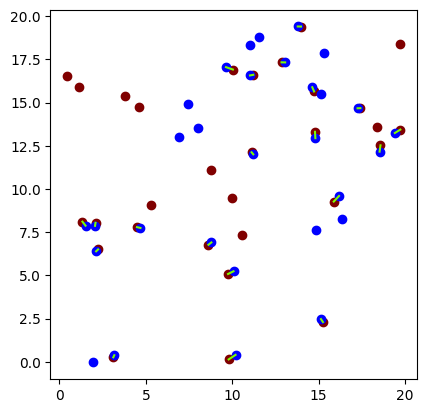

In [19]:
map1, map2, true_correspondences = dataset_generator.generate()
plot_correspondences(map1, map2, true_correspondences)

Finally, we'll run CLIPPER and visually compare the selected associations. We should expect a subset of the true correspondences to be selected by CLIPPER

In [20]:
clipper_pt_reg = DistOnlyReg(sigma=sigma, epsilon=sigma*2)
selected_associations = clipper_pt_reg.register(map1, map2)
mno_solutions = clipper_pt_reg.mno_clipper(map1, map2, 2)

In [21]:
print(mno_solutions)

[(array([[ 5,  5],
       [ 6,  6],
       [11, 11],
       [19, 19],
       [13, 13],
       [16, 16],
       [14, 14],
       [ 2,  2],
       [ 9,  9]]), 7.21165531048647), (array([[ 8,  8],
       [ 7,  7],
       [ 1,  1],
       [15, 15],
       [ 0,  0],
       [14, 14]]), 3.9836322850175274)]


score: 7.21165531048647
score: 3.9836322850175274


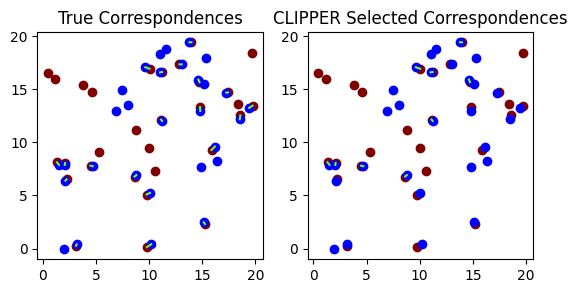

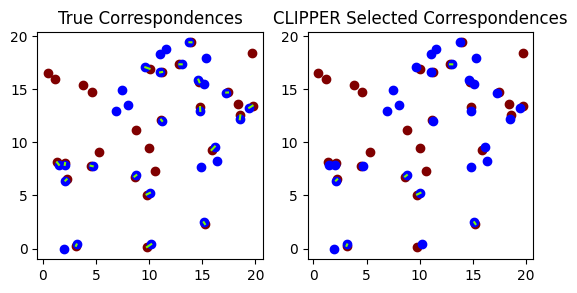

In [22]:
fig, ax = plt.subplots(1,2)
plot_correspondences(map1, map2, true_correspondences, ax=ax[0])
ax[0].set_title("True Correspondences")
plot_correspondences(map1, map2, mno_solutions[0][0], ax=ax[1])
ax[1].set_title("CLIPPER Selected Correspondences")
print(f"score: {mno_solutions[0][1]}")

fig, ax = plt.subplots(1,2)
plot_correspondences(map1, map2, true_correspondences, ax=ax[0])
ax[0].set_title("True Correspondences")
plot_correspondences(map1, map2, mno_solutions[1][0], ax=ax[1])
ax[1].set_title("CLIPPER Selected Correspondences")
print(f"score: {mno_solutions[1][1]}")